In [ ]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [ ]:
class LeNet5(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv_1 = nn.Sequential(
          nn.Conv2d(in_channels=1,out_channels=6, kernel_size=5, stride=1),
          nn.ReLU(),
          nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
      self.conv_2 = nn.Sequential(
          nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
          nn.ReLU(),
          nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
      self.fc_1 = nn.Linear(in_features=256, out_features=120, bias=True)
      self.fc_2 = nn.Linear(120, 84, bias=True)
      self.relu_3 = nn.ReLU()

      self.fc_3 = nn.Linear(84, 10, bias=True)

  def forward(self, x):
      x = self.conv_1(x)
      x = self.conv_2(x)
      x = torch.flatten(x, 1)
      x = self.fc_1(x)
      x = self.fc_2(x)
      x = self.relu_3(x)
      x = self.fc_3(x)
      return x

In [ ]:
print(LeNet5())

LeNet5(
  (conv_1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (conv_2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_1): Linear(in_features=256, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (relu_3): ReLU()
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST(root='data', train=False, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
batch_size = 256
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LeNet5().to(device)
sgd = SGD(model.parameters(), lr=1e-1)
loss_fn = CrossEntropyLoss()
epochs = 100
prev_acc = 0

for epoch in range(epochs):
  model.train()
  for idx, (data, label) in enumerate(train_loader):
    data = data.to(device)
    label = label.to(device)
    sgd.zero_grad()
    predict = model(data.float())
    loss = loss_fn(predict, label.long())
    loss.backward()
    sgd.step()
  
  all_correct_num = 0
  all_sample_num = 0
  model.eval()

  for idx, (data, label) in enumerate(test_loader):
    data = data.to(device) 
    label = label.to(device)
    predict = model(data.float()).detach()
    predict = torch.argmax(predict, dim=-1)
    current_correct_num = predict == label
    all_correct_num += np.sum(current_correct_num.to('cpu').numpy(), axis=-1)
    all_sample_num += current_correct_num.shape[0]
  
  acc = all_correct_num / all_sample_num
  print("accuracy: ", acc)

accuracy:  0.8196
accuracy:  0.8903
accuracy:  0.9304
accuracy:  0.945
accuracy:  0.9551
accuracy:  0.962
accuracy:  0.9683
accuracy:  0.9726
accuracy:  0.9747
accuracy:  0.9769
accuracy:  0.978
accuracy:  0.9797
accuracy:  0.9793
accuracy:  0.9802
accuracy:  0.9806
accuracy:  0.9812
accuracy:  0.9812
accuracy:  0.9815
accuracy:  0.9819
accuracy:  0.9816
accuracy:  0.9822
accuracy:  0.982
accuracy:  0.9831
accuracy:  0.9819
accuracy:  0.9825
accuracy:  0.9822
accuracy:  0.9821
accuracy:  0.9829
accuracy:  0.9822
accuracy:  0.9833
accuracy:  0.9824
accuracy:  0.9828
accuracy:  0.9835
accuracy:  0.9829
accuracy:  0.9835
accuracy:  0.9829
accuracy:  0.9831
accuracy:  0.984
accuracy:  0.9833
accuracy:  0.9823
accuracy:  0.9842
accuracy:  0.9833
accuracy:  0.9832
accuracy:  0.9832
accuracy:  0.9839
accuracy:  0.9833
accuracy:  0.9837
accuracy:  0.9845
accuracy:  0.9848
accuracy:  0.9861
accuracy:  0.9862
accuracy:  0.9864
accuracy:  0.9865
accuracy:  0.9863
accuracy:  0.987
accuracy:  0.986

KeyboardInterrupt: ignored

In [ ]:
torch.save(model.state_dict(), 'lenet5.pt')

In [ ]:
from google.colab import files
files.download('lenet5.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# train LeNet5 with augmented data
device = 'cuda' if torch.cuda.is_available() else 'cpu'
state_dict = torch.load('lenet5.pt')
model = LeNet5().to(device)
model.load_state_dict(state_dict)
model.eval()

LeNet5(
  (conv_1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (conv_2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_1): Linear(in_features=256, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (relu_3): ReLU()
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# import new tests created with ddpm
new_tests = torch.load('annotated_tests_ddim.pt')

In [ ]:
# define as a custom pytorch dataset
from torch.utils.data import Dataset

class AugmentedMNIST(Dataset):
  def __init__(self, tests):
    self.samples = tests
  
  def __len__(self):
    return len(self.samples)
  
  def __getitem__(self, idx):
    return self.samples[idx]

In [ ]:
augmented_tests = AugmentedMNIST(new_tests)
augmented_dataloader = DataLoader(augmented_tests, batch_size=1)

In [ ]:
all_correct_num = 0
all_sample_num = 0
incorrect = []
model.eval()
for idx, (data, label) in enumerate(augmented_dataloader):
    data = data.to(device) 
    label = label.to(device)
    predict = model(data.float()).detach()
    predict = torch.argmax(predict, dim=-1)
    current_correct_num = predict == label
    if current_correct_num.item() == False:
      incorrect.append((idx, label))
    all_correct_num += np.sum(current_correct_num.to('cpu').numpy(), axis=-1)
    all_sample_num += current_correct_num.shape[0]

In [ ]:
acc = all_correct_num / all_sample_num

In [ ]:
all_correct_num

504

In [ ]:
all_sample_num

5040

In [ ]:
acc

0.1

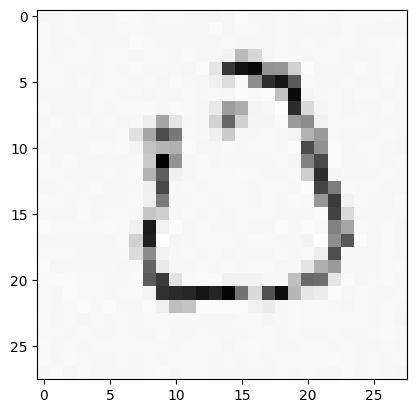

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(augmented_tests[incorrect[3000][0]][0].permute(1,2,0).cpu(),cmap='Greys')

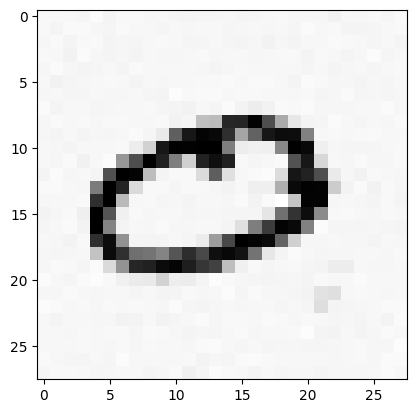

In [ ]:
plt.imshow(augmented_tests[5039][0].permute(1,2,0).cpu(),cmap='Greys')

In [ ]:
len(incorrect)

4536

In [ ]:
import torch
tests = torch.load('tests.pt')

In [ ]:
len(tests)

63

In [ ]:
tests[0][0].shape

torch.Size([1, 28, 28])

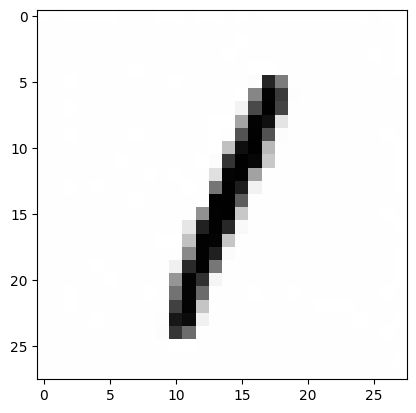

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(tests[0][8].permute(1,2,0).cpu(),cmap='Greys')

In [ ]:
annotated_tests = []
for batch in tests:
  for i in range(len(batch)):
    cur_num = int(i/8)
    annotated_tests.append((batch[i].cpu(), cur_num))

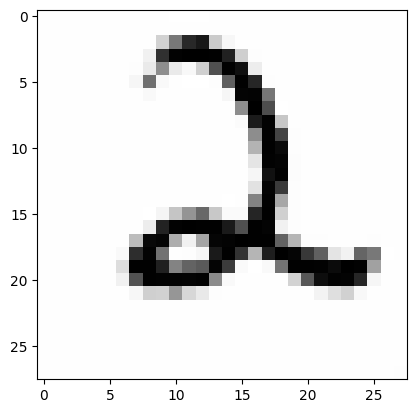

In [ ]:
plt.imshow(annotated_tests[16][0].permute(1,2,0).cpu(),cmap='Greys')

In [ ]:
annotated_tests[16][1]

2

In [ ]:
len(annotated_tests)

5040

In [ ]:
augmented_tests = AugmentedMNIST(annotated_tests)
augmented_dataloader = DataLoader(annotated_tests, batch_size=1)

all_correct_num = 0
all_sample_num = 0
incorrect = []
model.eval()
for idx, (data, label) in enumerate(augmented_dataloader):
    data = data.to(device) 
    label = label.to(device)
    predict = model(data.float()).detach()
    predict = torch.argmax(predict, dim=-1)
    current_correct_num = predict == label
    if current_correct_num.item() == False:
      incorrect.append((idx, label))
    all_correct_num += np.sum(current_correct_num.to('cpu').numpy(), axis=-1)
    all_sample_num += current_correct_num.shape[0]

In [ ]:
all_sample_num - all_correct_num

NameError: ignored

In [ ]:
acc = all_correct_num / all_sample_num

In [ ]:
acc

0.9781746031746031

In [ ]:
torch.save(annotated_tests, 'annotated_tests.pt')